<a href="https://colab.research.google.com/github/fausiahms/Machine-Learning/blob/main/TASK1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Husnul Fausiah Magistrawati
#H081211021

In [2]:
#Import Library

import pandas as pd
import os

In [3]:
#Import data dari drive

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#Data
data_comp = pd.read_csv('/content/drive/MyDrive/top10co.csv')
data_comp

In [ ]:
#Melihat 5 data teratas
data_comp.head(5)

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [ ]:
#Melihat tipe data
data_comp.dtypes
#Int : Bilangan Bulat
#Float : Bilangan riil
#Object : Bukan bilangan

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [ ]:
#Menghapus kolom pertama hingga kedua
data_comp_1 = data_comp.iloc[:,2:]
data_comp_1

,Close/Last,Volume,Open,High,Low
0,$193.99,50520160,$191.90,$194.32,$191.81
1,$190.69,41616240,$190.23,$191.1799,$189.63
2,$190.54,41342340,$190.50,$191.19,$189.78
3,$189.77,60750250,$189.68,$191.70,$188.47
4,$188.08,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...
25155,$34.4714,33395351,$35.6743,$36.0357,$34.3143
25156,$35.7514,76792963,$35.9143,$37.4621,$35.1714
25157,$37.4228,44791095,$38.1214,$38.3928,$36.7314
25158,$37.7966,18098750,$38.2043,$38.2784,$37.5971


In [ ]:
#Another code
data_comp_2 = data_comp.drop(data_comp.columns[2], axis=1)
data_comp_2

,Company,Date,Volume,Open,High,Low
0,AAPL,07/17/2023,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,46638120,$189.16,$189.30,$186.60
...,...,...,...,...,...,...
25155,NFLX,07/24/2013,33395351,$35.6743,$36.0357,$34.3143
25156,NFLX,07/23/2013,76792963,$35.9143,$37.4621,$35.1714
25157,NFLX,07/22/2013,44791095,$38.1214,$38.3928,$36.7314
25158,NFLX,07/19/2013,18098750,$38.2043,$38.2784,$37.5971


from matplotlib import pyplot as plt
data_comp_2['Volume'].plot(kind='hist', bins=20, title='Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Volume']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_comp_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Volume')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_comp_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data_comp_2['Volume'].plot(kind='line', figsize=(8, 4), title='Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Statistika Deskriptif
data_comp.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


In [ ]:
#Hubungan antarvariabel menggunakan korelasi
korelasi = data_comp.corr()

<ipython-input-7-5b1976aec891>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = data_comp.corr()


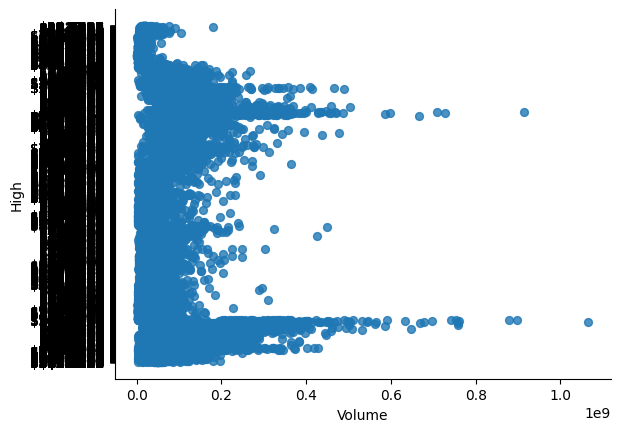

In [ ]:
from matplotlib import pyplot as plt
data_comp.plot(kind='scatter', x='Volume', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

WITH API

In [ ]:
!pip install kaggle

In [4]:
import os
from google.colab import files

# Pastikan file kaggle.json sudah diunggah
if not os.path.exists("/content/drive/MyDrive/kaggle (1).json"):
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))
    # Pindahkan file kaggle.json ke direktori yang tepat
    !mkdir -p ~/.kaggle
    !mv kaggle.json ~/.kaggle/
    !chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets list -s "stocks company"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
